In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import missingno as msno
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from sklearn.utils import shuffle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chaimaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chaimaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data importation

In [2]:
users = pd.read_csv("../dataset/users.csv")
fusers= pd.read_csv("../dataset/fusers.csv")

In [3]:
users['is_fake'] = 0
fusers['is_fake'] = 1

In [4]:
users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [5]:
fusers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [6]:
data = pd.concat([users,fusers],ignore_index=True)

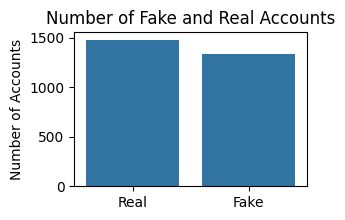

In [7]:
account_counts = data['is_fake'].value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()

## Splitting the data 

##### Before cleaning, we need to split our dataset into train and test/ validation data. If we clean and pre-process both true and fake data together, then it leads to over-fitting because our test data would seen the train data. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='is_fake'), data['is_fake'], test_size=0.2, random_state=42, stratify=data['is_fake'])

In [9]:
columns_to_drop = ['id', 'name', 'screen_name', 'created_at', 'url', 'time_zone', 'profile_image_url', 'profile_banner_url', 'profile_background_image_url_https', 'profile_image_url_https', 'profile_sidebar_border_color', 'profile_background_image_url', 'profile_background_color', 'location','updated','profile_link_color', 'utc_offset', 'dataset','profile_background_tile','profile_text_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_use_background_image','default_profile_image']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# EDA

<Figure size 600x300 with 0 Axes>

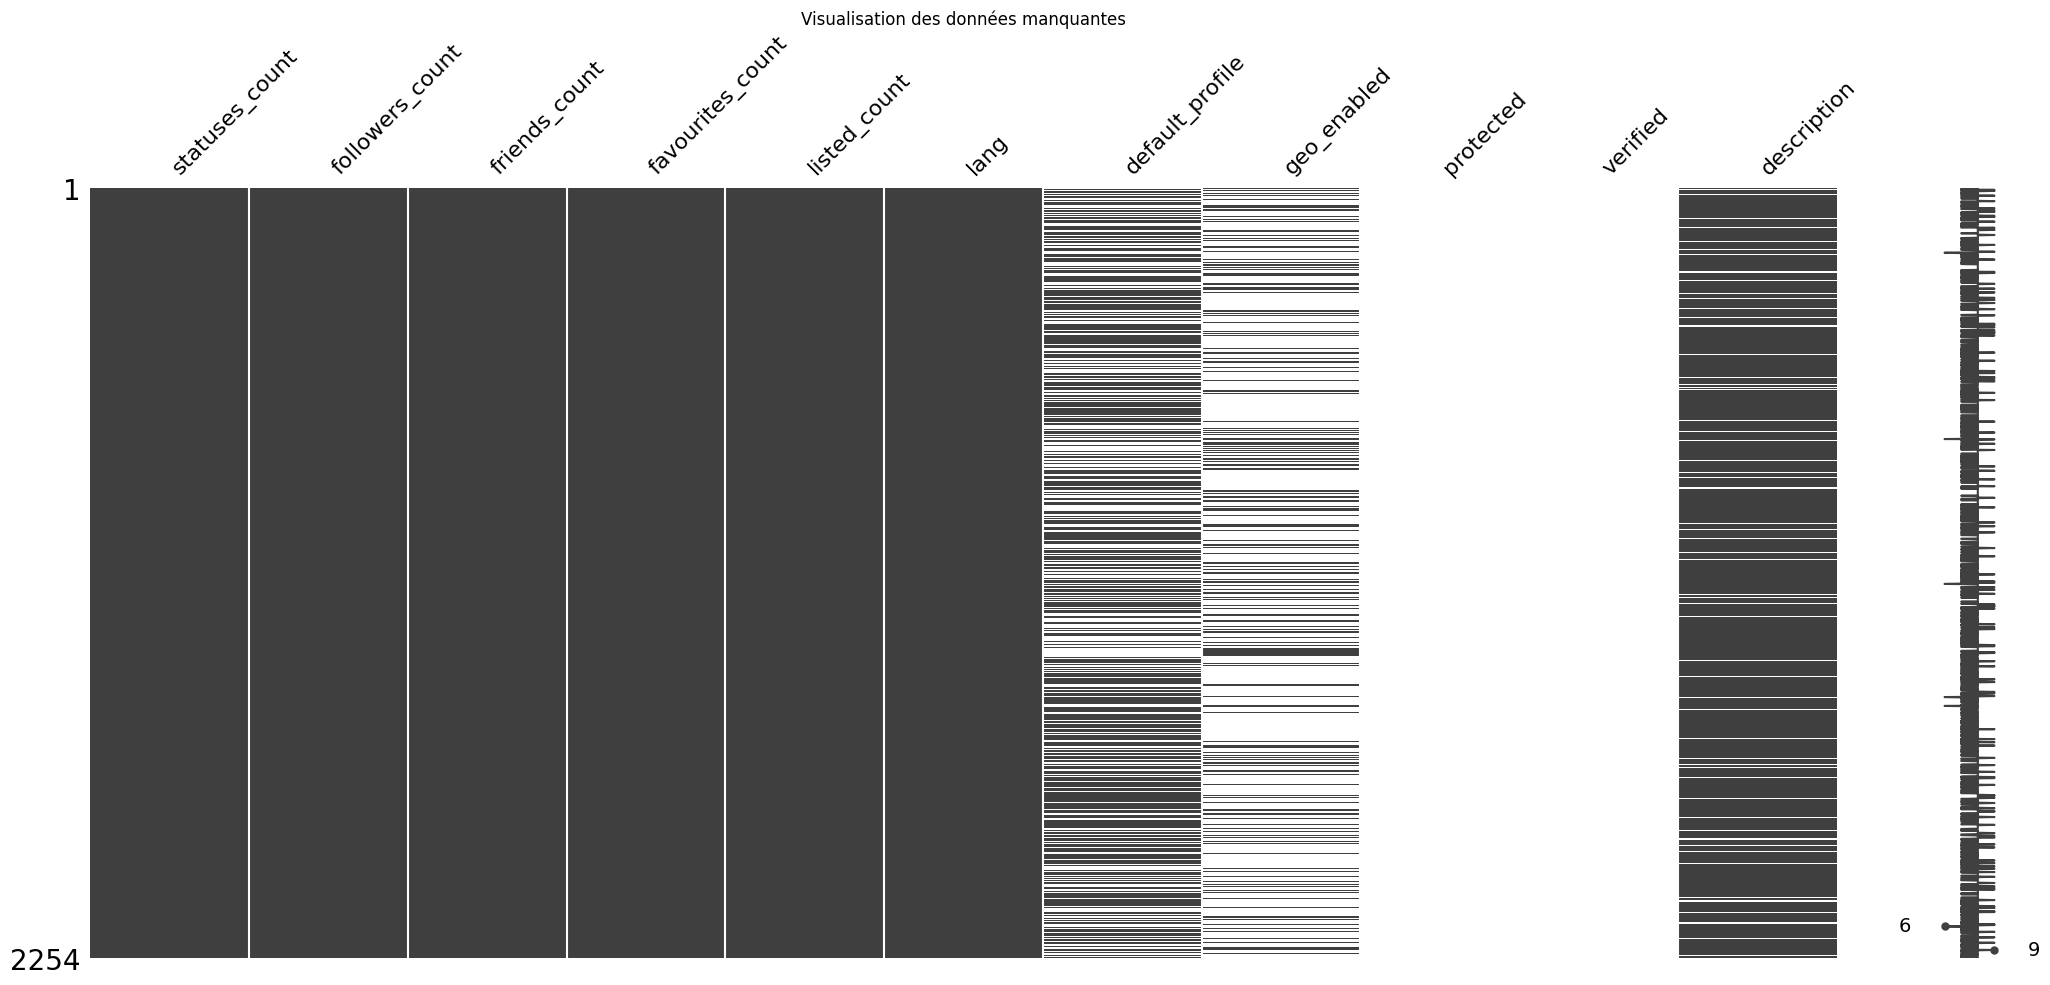

In [10]:

plt.figure(figsize=(6, 3))
msno.matrix(X_train)
plt.title('Visualisation des données manquantes')
plt.show()

<Figure size 600x300 with 0 Axes>

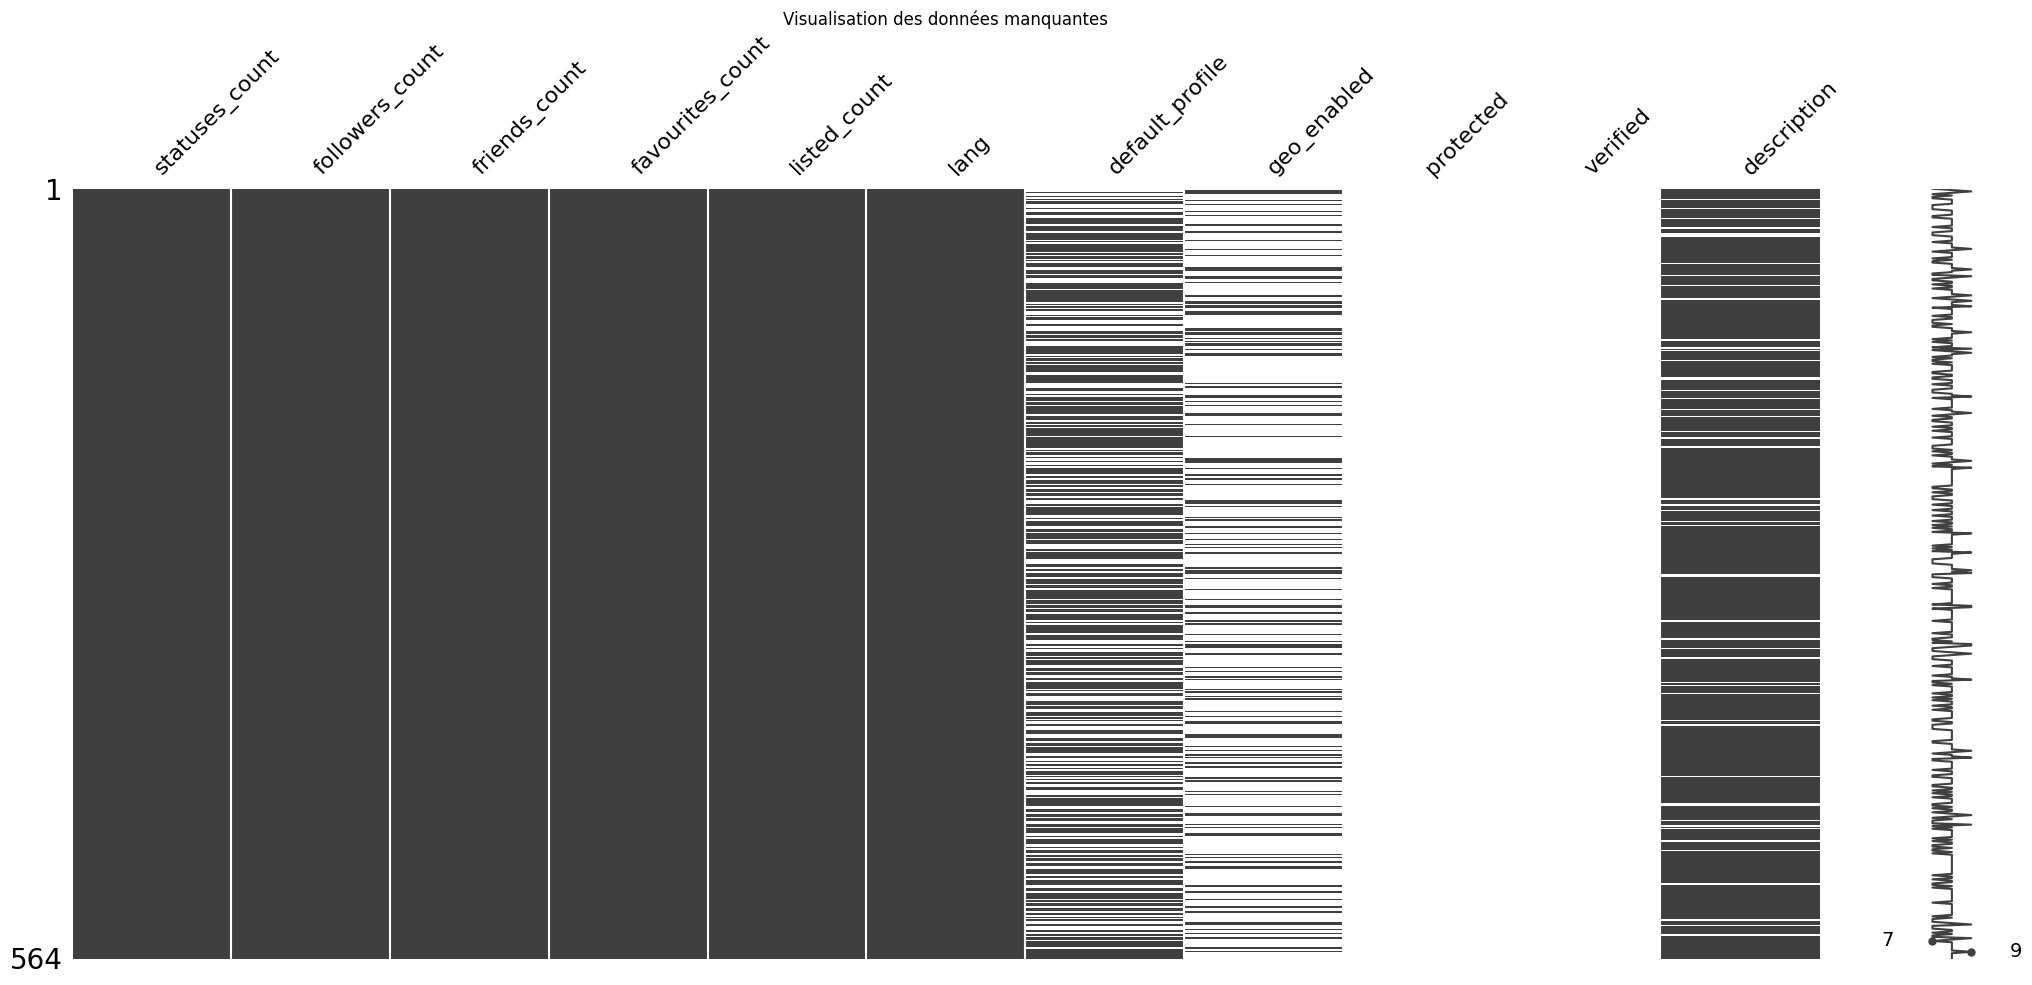

In [11]:

plt.figure(figsize=(6, 3))
msno.matrix(X_test)
plt.title('Visualisation des données manquantes')
plt.show()

## Data Cleaning

In [12]:
#Filling Null values for Xtrain
X_train['default_profile'] = X_train['default_profile'].fillna(0) 
X_train['geo_enabled'] = X_train['geo_enabled'].fillna(0)
X_train = X_train.drop(columns=['verified', 'protected'])
#Filling Null values for Xtrain
X_test['default_profile'] = X_test['default_profile'].fillna(0) 
X_test['geo_enabled'] = X_test['geo_enabled'].fillna(0)
X_test = X_test.drop(columns=['verified', 'protected'])

<Figure size 600x300 with 0 Axes>

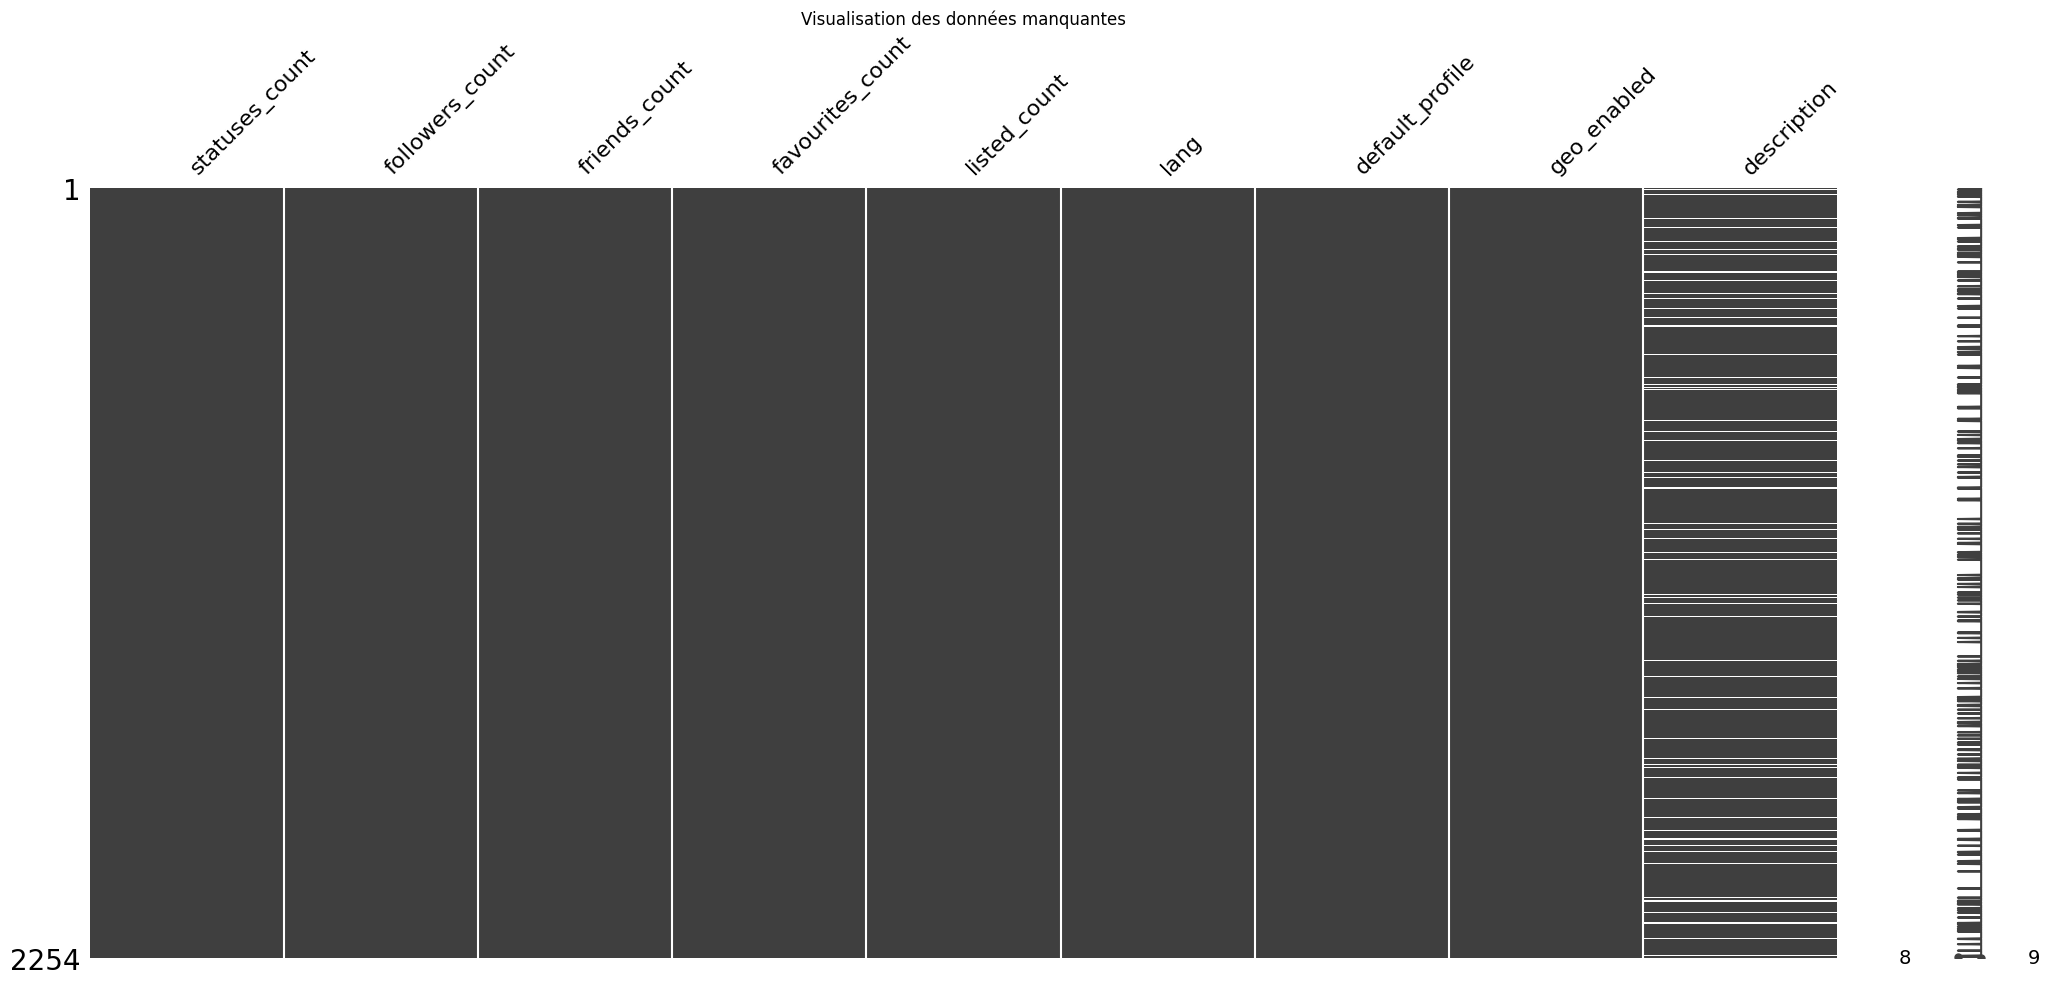

In [13]:
plt.figure(figsize=(6, 3))
msno.matrix(X_train)
plt.title('Visualisation des données manquantes')
plt.show()

<Figure size 600x300 with 0 Axes>

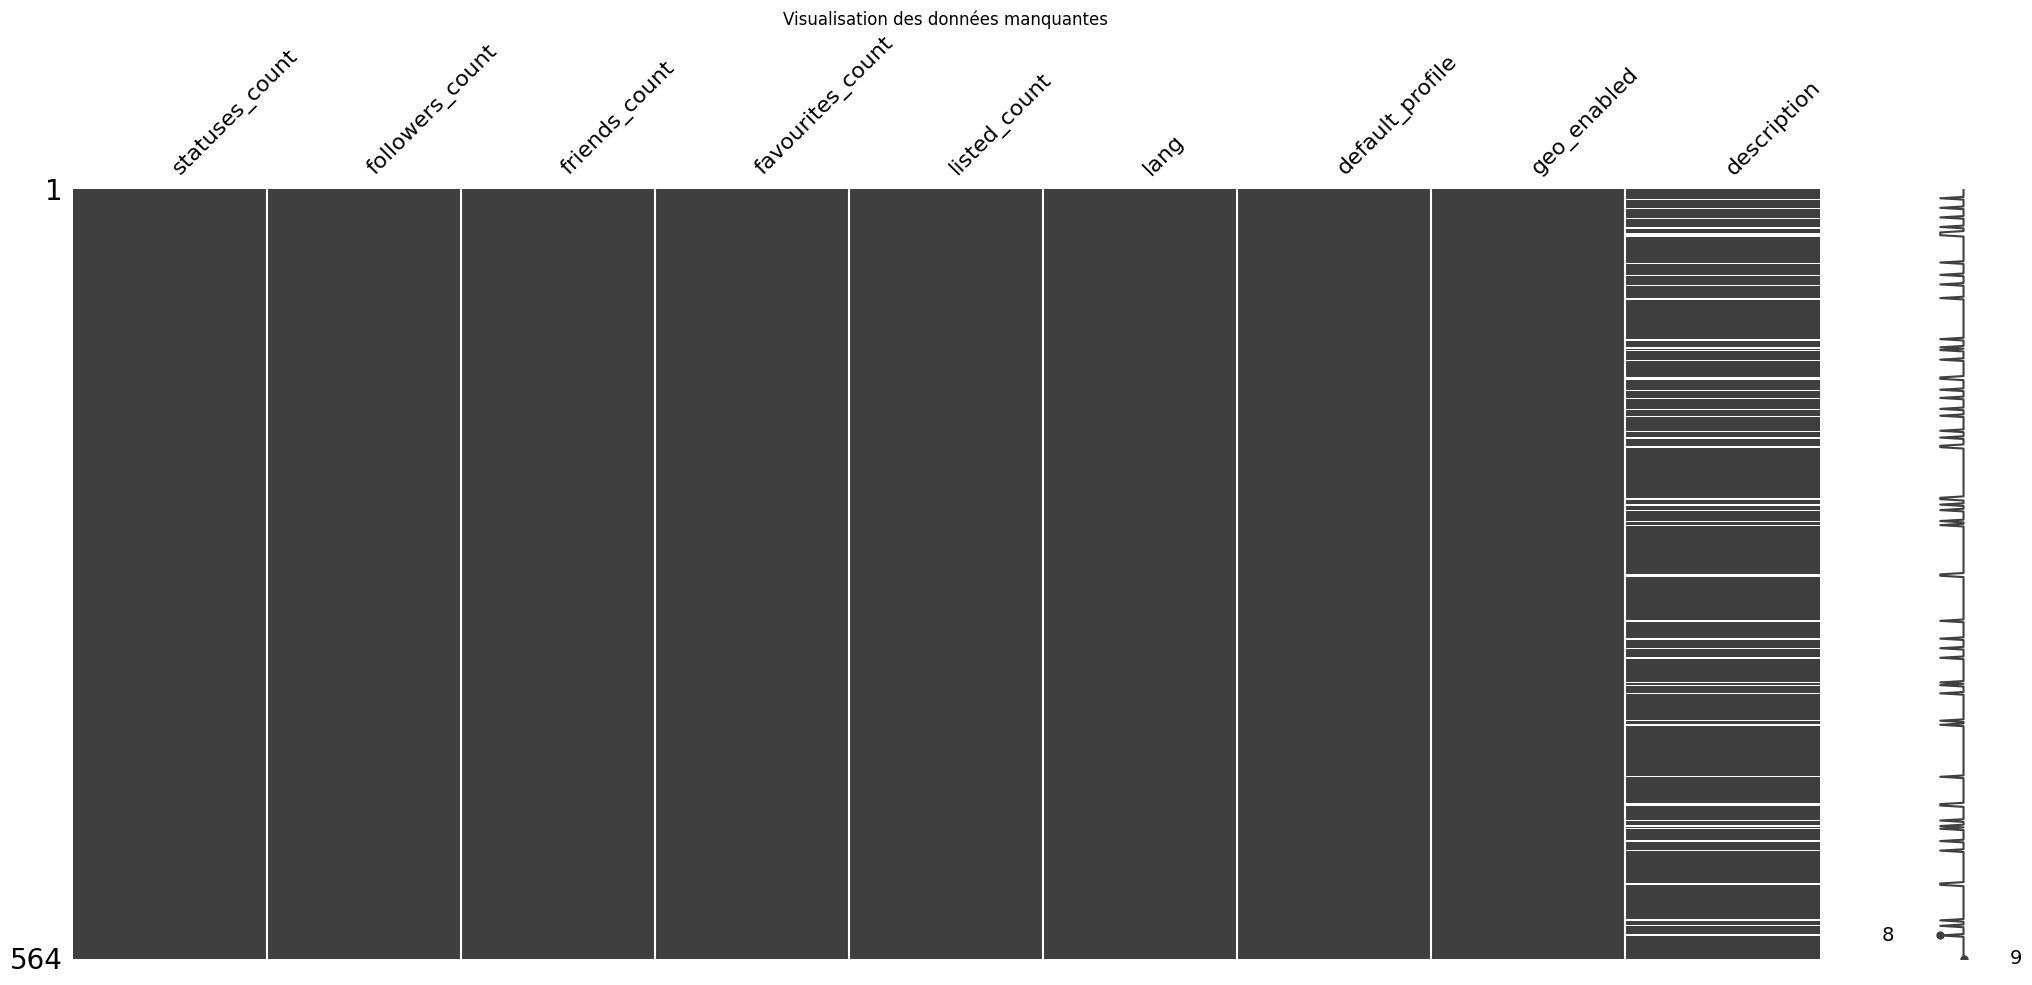

In [14]:
plt.figure(figsize=(6, 3))
msno.matrix(X_test)
plt.title('Visualisation des données manquantes')
plt.show()

In [15]:
#X_train = X_train.dropna(subset=['description'])
#X_test = X_test.dropna(subset=['description'])

In [16]:
blank_percentage = X_train['description'].isna().mean() * 100
non_blank_percentage = 100 - blank_percentage
fig = px.pie(
    names=['Blank', 'Non-Blank'],
    values=[blank_percentage, non_blank_percentage],
    title='Percentage of Blank Cells in Description'
)
fig.show()

In [17]:
lang_counts = X_train['lang'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']
fig5 = px.bar(lang_counts, x='Language', y='Count', 
              title='Distribution of Languages', labels={'Language': 'Language', 'Count': 'Count'})
fig5.show()

In [18]:
import plotly.graph_objects as go

# Create box plots for each metric
fig_combined = go.Figure()

fig_combined.add_trace(go.Box(
    y=X_train['followers_count'],
    x=y_train,
    name='Followers Count',
    marker_color='blue'
))

fig_combined.add_trace(go.Box(
    y=X_train['friends_count'],
    x=y_train,
    name='Friends Count',
    marker_color='green'
))

fig_combined.add_trace(go.Box(
    y=X_train['statuses_count'],
    x=y_train,
    name='Statuses Count',
    marker_color='purple'
))

# Update layout
fig_combined.update_layout(
    title='Distribution of Followers, Friends, and Statuses Count by Fake/Real Users',
    xaxis_title='Is Fake',
    yaxis_title='Count',
    boxmode='group'
)

fig_combined.show()

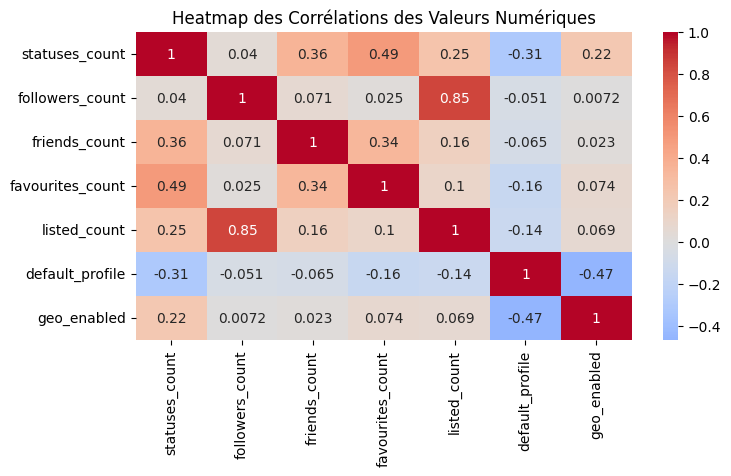

In [19]:
numerical_data = X_train.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Corrélations des Valeurs Numériques')
plt.show()

## Data Augmentation

In [ ]:
X_train['is_fake']=y_train
def insert_random_words(text, n_inserts=2):
    words = text.split()
    word_list = list(wordnet.words())
    for _ in range(n_inserts):
        random_word = random.choice(word_list)
        insert_position = random.randint(0, len(words))
        words.insert(insert_position, random_word)
    return ' '.join(words)

# Calculate the difference in counts between real and fake users
real_count = X_train[X_train['is_fake'] == 0].shape[0]
fake_count = X_train[X_train['is_fake'] == 1].shape[0]
difference = abs(real_count - fake_count)

# Augment the descriptions of the minority class
if real_count > fake_count:
    minority_class = X_train[X_train['is_fake'] == 1]
else:
    minority_class = X_train[X_train['is_fake'] == 0]

augmented_rows = []
for i in range(difference):
    row = minority_class.sample(n=1).iloc[0]
    row['description'] = row['description'] if pd.notna(row['description']) else ''
    row['description_aug'] = insert_random_words(row['description'], n_inserts=2)
    augmented_rows.append(row)

# Create a new dataframe with the augmented rows
augmented_df = pd.DataFrame(augmented_rows)

balanced_X_train = pd.concat([X_train, augmented_df.drop(columns=['description_aug'])], ignore_index=True)
y_train = balanced_X_train['is_fake']
X_train.drop(columns=['is_fake'], inplace=True)
balanced_X_train = shuffle(balanced_X_train)


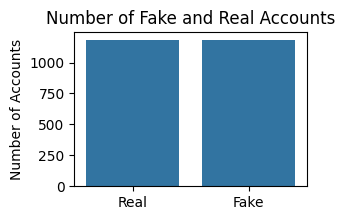

In [ ]:
account_counts = y_train.value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()

<Figure size 600x300 with 0 Axes>

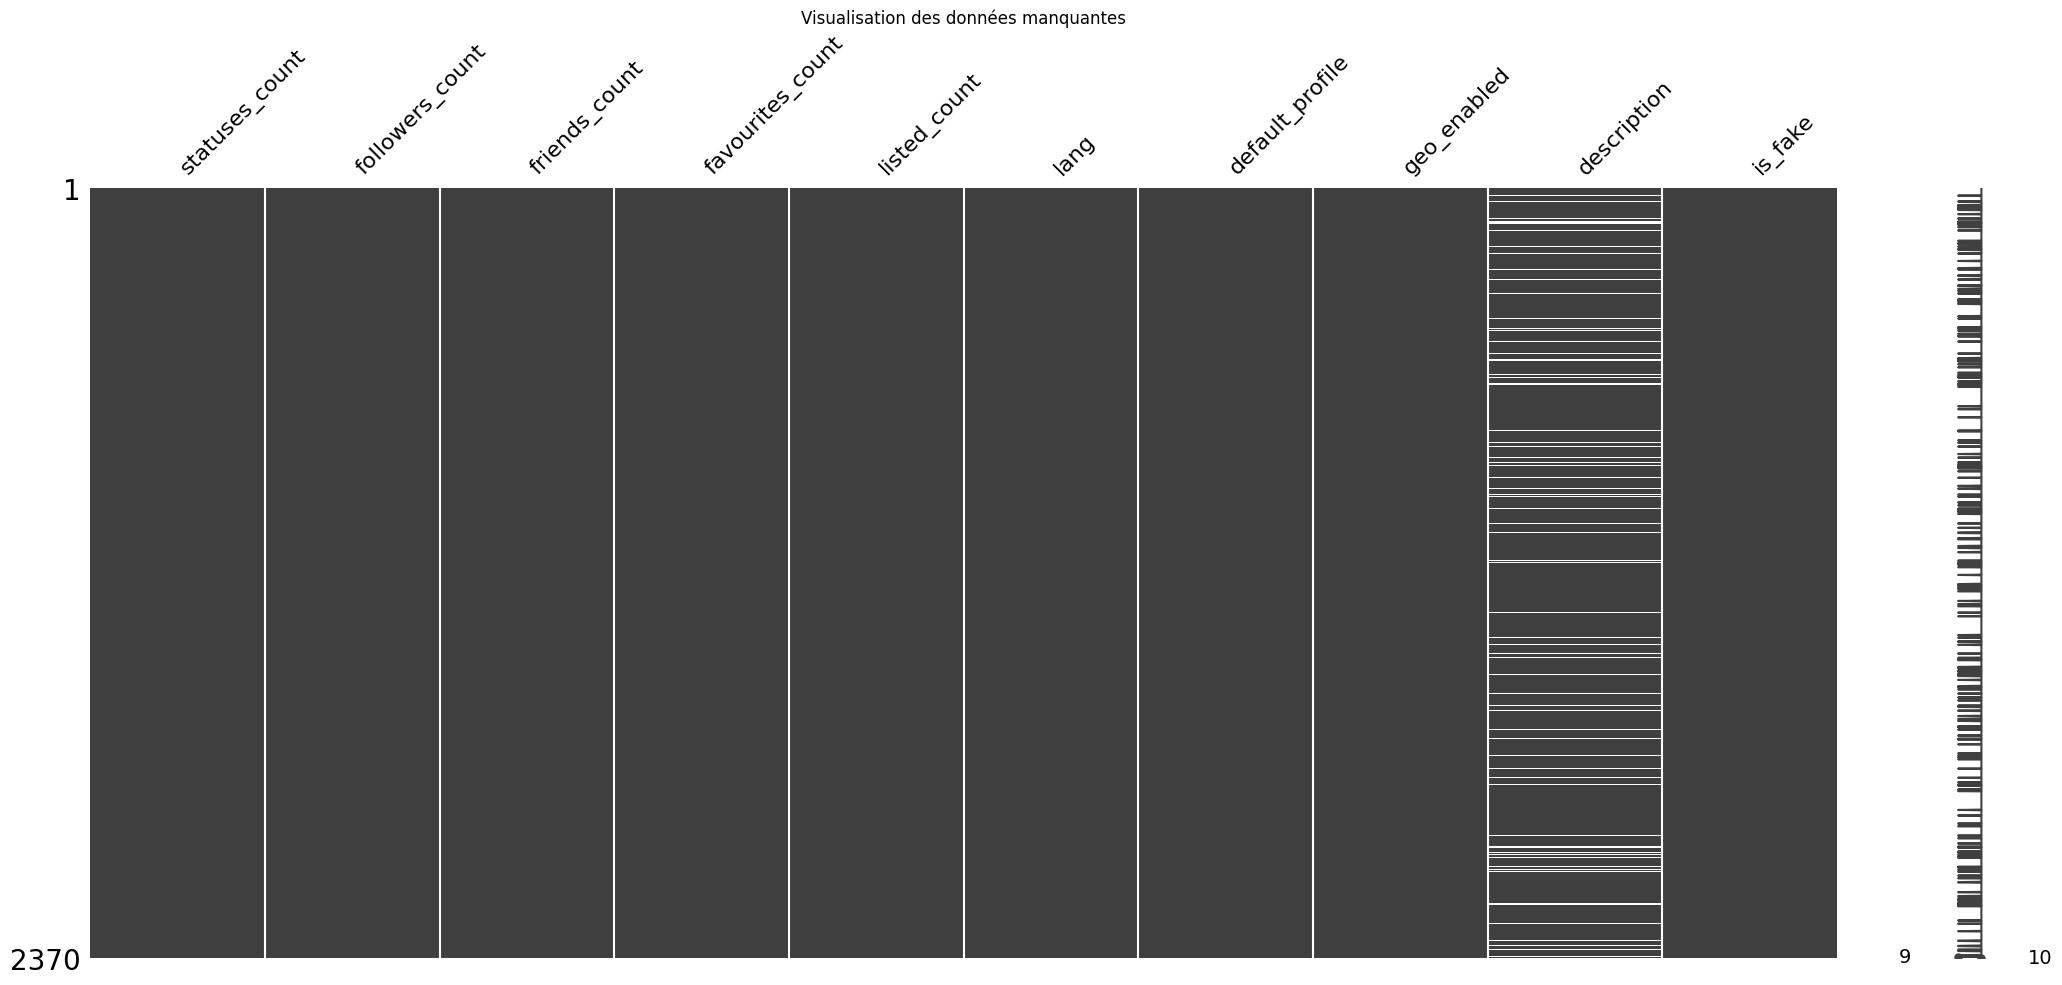

In [ ]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(balanced_X_train)
plt.title('Visualisation des données manquantes')
plt.show()

In [ ]:
stop_words = {
    'en': set(stopwords.words('english')),
    'it': set(stopwords.words('italian')),
    'es': set(stopwords.words('spanish'))
}

stemmers = {
    'en': SnowballStemmer('english'),
    'it': SnowballStemmer('italian'),
    'es': SnowballStemmer('spanish')
}

# Fonction de prétraitement pour chaque document
def normalize_document(doc, lang):
    # Mise en minuscules et suppression des caractères spéciaux (garde uniquement les lettres)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I | re.A)
    doc = doc.lower().strip()
    
    # Tokenisation
    tokens = word_tokenize(doc)
    
    # Filtrer les stopwords en fonction de la langue
    tokens = [token for token in tokens if token not in stop_words.get(lang, set())]
    
    # Appliquer le stemming en fonction de la langue
    stemmer = stemmers.get(lang, SnowballStemmer('english'))
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Recréer le document à partir des tokens
    doc = ' '.join(tokens)
    return doc


# Remplir les valeurs NaN dans la colonne 'description' avec une chaîne vide
balanced_X_train['description'] = balanced_X_train['description'].fillna('')

# Appliquer le prétraitement à la colonne 'description' en utilisant la langue spécifiée
balanced_X_train['processed_description'] = balanced_X_train.apply(lambda row: normalize_document(row['description'], row['lang']), axis=1)

# Afficher les descriptions prétraitées
balanced_X_train[['description', 'processed_description']]

X_test['description'] = X_test['description'].fillna('')
X_test['processed_description'] = X_test.apply(lambda row: normalize_document(row['description'], row['lang']), axis=1)

# Afficher les descriptions prétraitées
X_test[['description', 'processed_description']]


,description,processed_description
1277,Esperta in Ricerca&Selezione del personale: da...,espert ricercaselezion personal datem cv solle...
121,19 years old. Adoro ridere e viaggiare. Credo ...,year old adoro rider e viaggiar credo nella mu...
742,Che minchia guaddi??,minc guadd
751,la pazzia è come il Paradiso.Quando arrivi al ...,pazz paradisoqu arriv punt te freg pi nient al...
384,Ipotesa.Ipoglicemica.Ho più ricci che capricci...,ipotesaipoglicemicah pi ricc capriccip libr an...
...,...,...
2535,sillwaiting :),sillwait
1552,"The Christia Home Business Association, Inc. i...",christia home busi associ inc dedic bring kngd...
2155,"19 años, actualmente realizando el CBC(en Filo...",ao actualment realizando el cbcen filo para es...
2396,folows back. http://t.co/SabpvpZBDK,folow back httptcosabpvpzbdk


# Prediction

#### Data vectorization

In [ ]:
# One-hot encode categorical features like 'lang' and 'default_profile'
encoder = OneHotEncoder(sparse=False)
X_train_cat = encoder.fit_transform(balanced_X_train[['lang', 'default_profile', 'geo_enabled']])
X_test_cat = encoder.transform(X_test[['lang', 'default_profile', 'geo_enabled']])

c:\Users\Chaimaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(balanced_X_train['processed_description']).toarray()
X_test_tfidf = tfidf.transform(X_test['processed_description'] ).toarray()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(balanced_X_train[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']])
X_test_scaled = scaler.transform(X_test[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']])

# Concatenate all features
X_train = np.hstack((X_train_tfidf, X_train_scaled, X_train_cat))
X_test = np.hstack((X_test_tfidf, X_test_scaled, X_test_cat))

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.60
Gradient Boosting Accuracy: 0.42
Logistic Regression Accuracy: 0.59
K-Nearest Neighbors Accuracy: 0.43
Support Vector Machine Accuracy: 0.56
Decision Tree Accuracy: 0.42


### Hyperparameter tuning

#### Random Forest

In [ ]:
"""from skopt import BayesSearchCV

classifiers = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "search_space": {
            "n_estimators": (50, 200),
            "max_depth": (5, 20),
            "min_samples_split": (2, 10)
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "search_space": {
            "n_estimators": (50, 200),
            "learning_rate": (0.01, 0.2, "log-uniform"),
            "max_depth": (3, 7)
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=200, random_state=42),
        "search_space": {
            "C": (0.01, 100, "log-uniform")
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "search_space": {
            "n_neighbors": (3, 15)
        }
    },
    "Support Vector Machine": {
        "model": SVC(random_state=42),
        "search_space": {
            "C": (0.1, 10, "log-uniform"),
            "gamma": (0.001, 1, "log-uniform")
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "search_space": {
            "max_depth": (5, 20),
            "min_samples_split": (2, 10)
        }
    }
}

# Dictionary to store best parameters and scores
best_params = {}
best_scores = {}

# Loop through each classifier to perform Bayesian Optimization
for classifier_name, clf_dict in classifiers.items():
    print(f"Optimizing {classifier_name}...")
    optimizer = BayesSearchCV(
        estimator=clf_dict["model"],
        search_spaces=clf_dict["search_space"],
        n_iter=10,  # Number of optimization iterations
        scoring="accuracy",
        cv=5,
        n_jobs=-1,
        random_state=42
    )
    
    optimizer.fit(X_train, y_train)
    
    # Store best parameters and score
    best_params[classifier_name] = optimizer.best_params_
    best_scores[classifier_name] = optimizer.best_score_
    print(f"Best Parameters for {classifier_name}: {optimizer.best_params_}")
    print(f"Best Cross-Validation Score for {classifier_name}: {optimizer.best_score_}\n")

# Output all results
print("Summary of Best Parameters and Scores:")
for clf_name in best_params:
    print(f"{clf_name}: Best Params = {best_params[clf_name]}, Best Score = {best_scores[clf_name]}")"""

'from skopt import BayesSearchCV\n\nclassifiers = {\n    "Random Forest": {\n        "model": RandomForestClassifier(random_state=42),\n        "search_space": {\n            "n_estimators": (50, 200),\n            "max_depth": (5, 20),\n            "min_samples_split": (2, 10)\n        }\n    },\n    "Gradient Boosting": {\n        "model": GradientBoostingClassifier(random_state=42),\n        "search_space": {\n            "n_estimators": (50, 200),\n            "learning_rate": (0.01, 0.2, "log-uniform"),\n            "max_depth": (3, 7)\n        }\n    },\n    "Logistic Regression": {\n        "model": LogisticRegression(max_iter=200, random_state=42),\n        "search_space": {\n            "C": (0.01, 100, "log-uniform")\n        }\n    },\n    "K-Nearest Neighbors": {\n        "model": KNeighborsClassifier(),\n        "search_space": {\n            "n_neighbors": (3, 15)\n        }\n    },\n    "Support Vector Machine": {\n        "model": SVC(random_state=42),\n        "search_